In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import plot_is

In [3]:
cd /project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin/

/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin


# Correctly setting external pressure and density profile 

In [24]:
dens_arr = np.loadtxt("../patch/hydro/isothermal_sphere/density.txt")

In [25]:
rho_c = 0.02806
scale_d = 3.92e-18
rho_min = min(dens_arr)*rho_c*scale_d
print rho_min

6.43260980602e-21


In [26]:
T_in = 10#K
k = 1.38e-16 #cgs
mp = 1.6726219e-24 #grams
scale_p =  2.51e-9 
P_out = (rho_min*k*T_in/mp)/scale_p 
print "Pressure at edge of cloud : ",P_out*scale_p , "cgs"
print "Pressure at edge of cloud: ", P_out , "code units"

Pressure at edge of cloud :  5.30723741708e-12 cgs
Pressure at edge of cloud:  0.00211443721796 code units


In [27]:
T_out = 1e7#K
rho_out = ((P_out*scale_p)*mp/k/T_out)/scale_d
print "Denisty outside the cloud: " , rho_out*scale_d,"cgs"
print "Denisty outside the cloud: ", rho_out , "code units"

Denisty outside the cloud:  6.43260980602e-27 cgs
Denisty outside the cloud:  1.64097188929e-09 code units


# Checking Pressure profile in cgs 


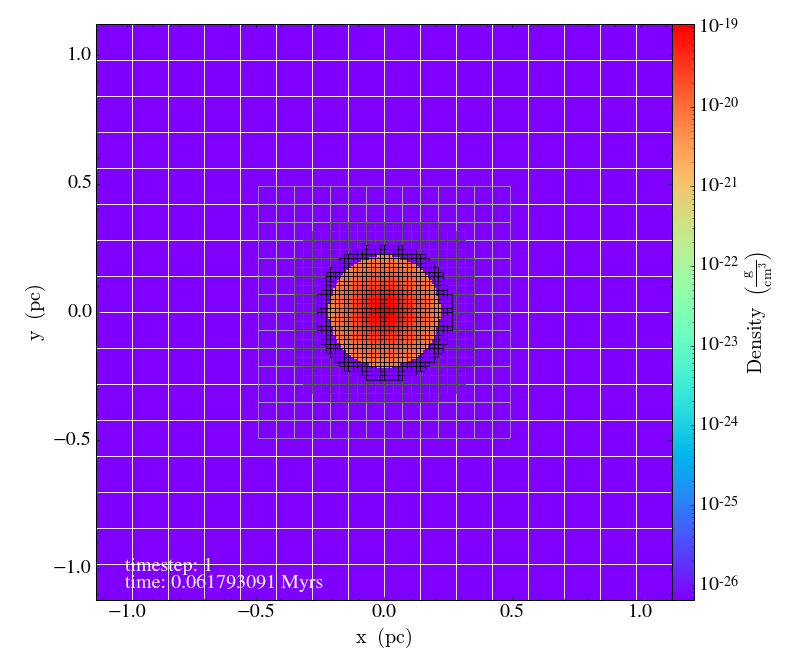


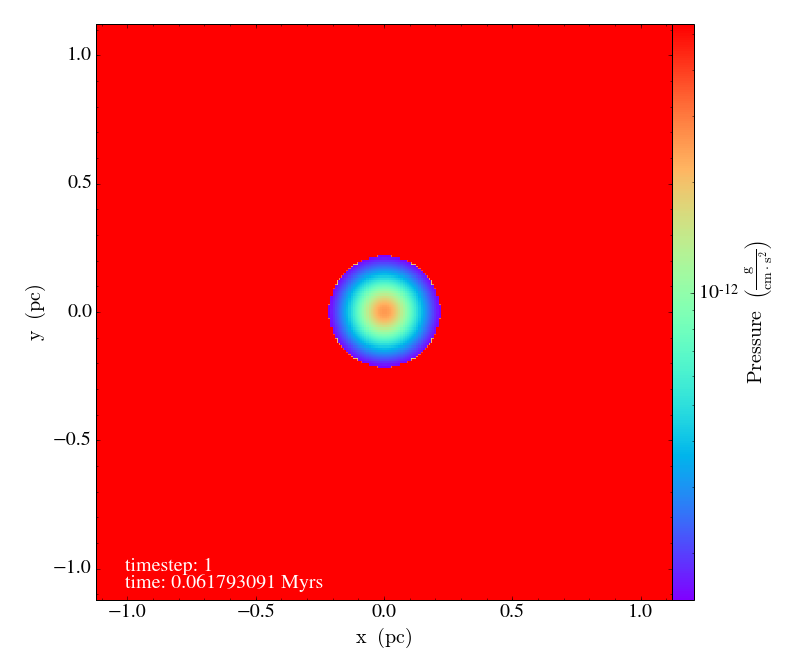


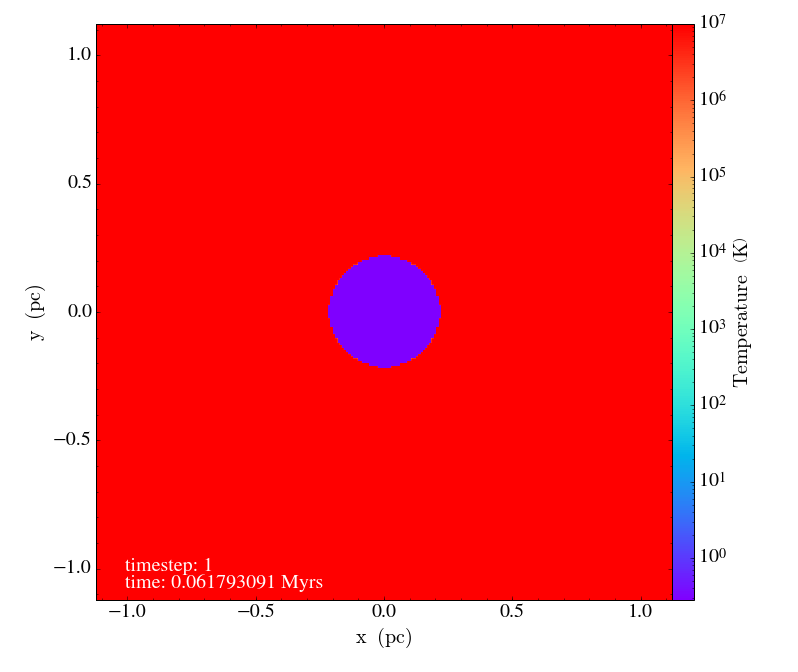

In [28]:
plot_is.plot_time_slice("density",1,grid=True)#,1,zmin=1e-26,zmax=1e-19)
plot_is.plot_time_slice("pressure",1)
plot_is.plot_time_slice("temperature",1)


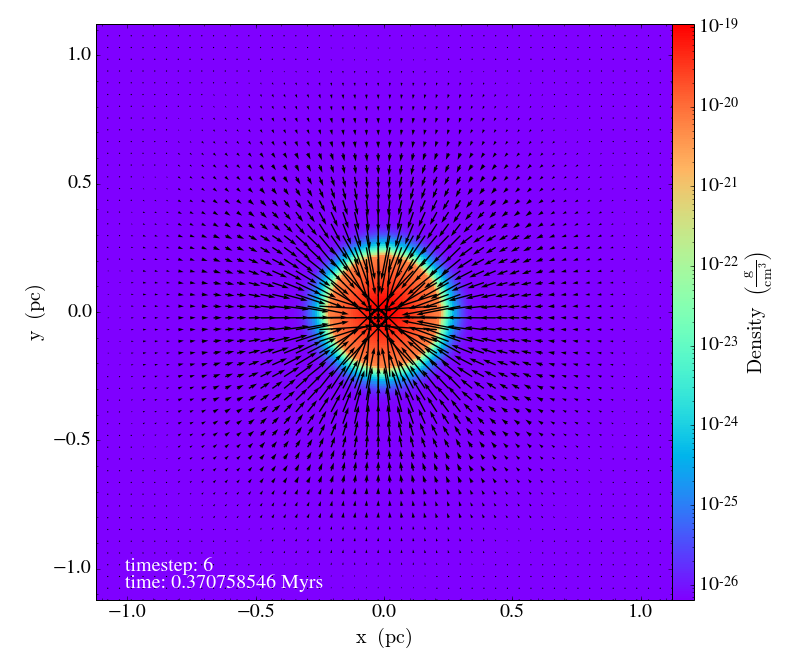

In [29]:
plot_is.plot_time_slice("density",6)


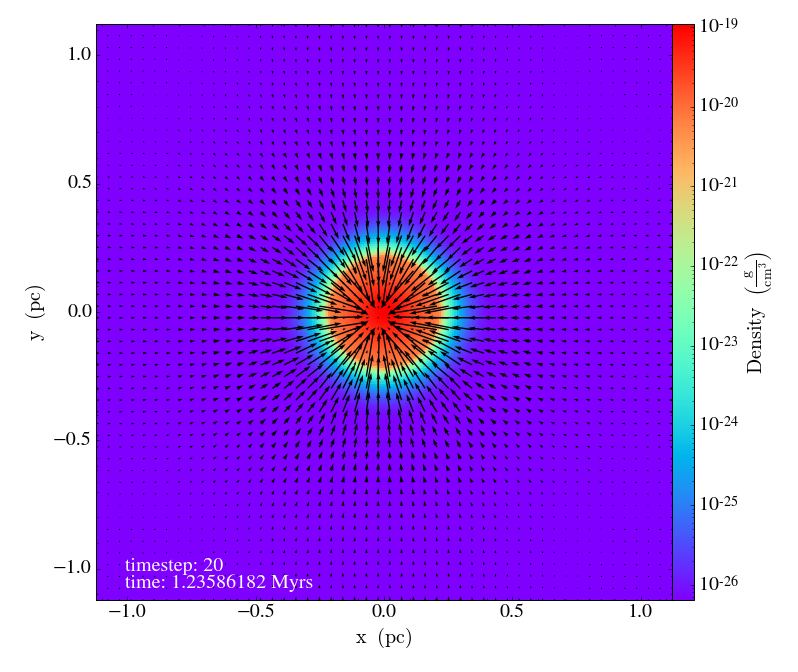

In [30]:
plot_is.plot_time_slice("density",20)


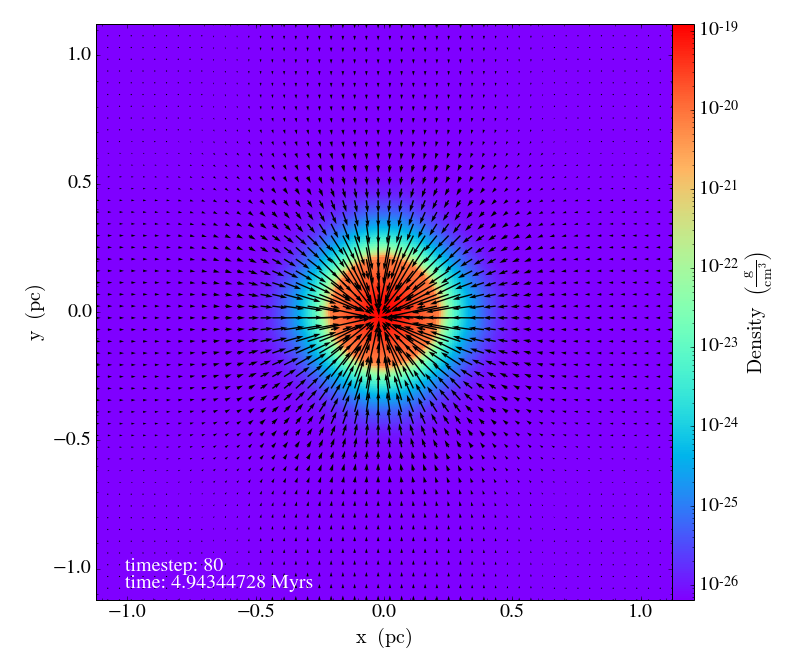

In [31]:
plot_is.plot_time_slice("density",80)


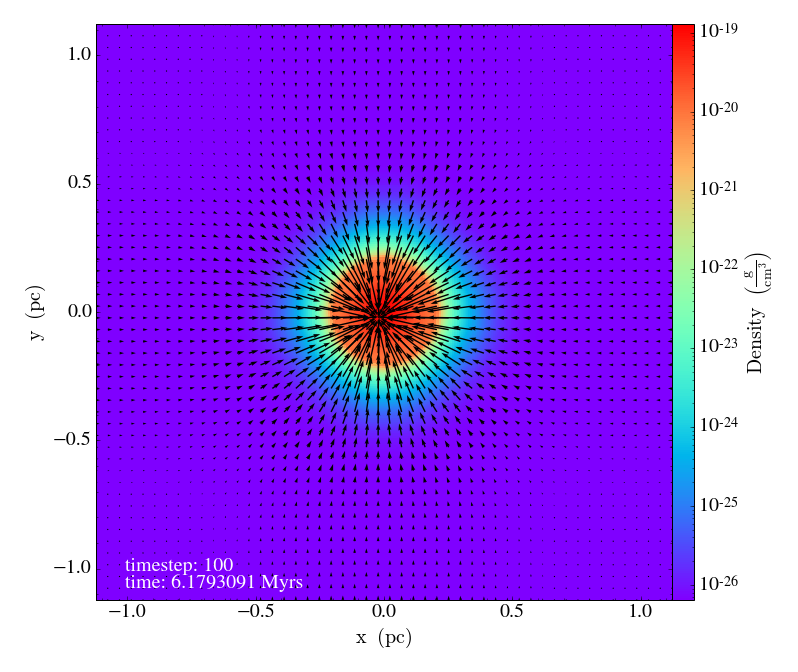

In [32]:
plot_is.plot_time_slice("density",100)

Nothing happened after 1 free fall time. I'll evolve it even more ...'


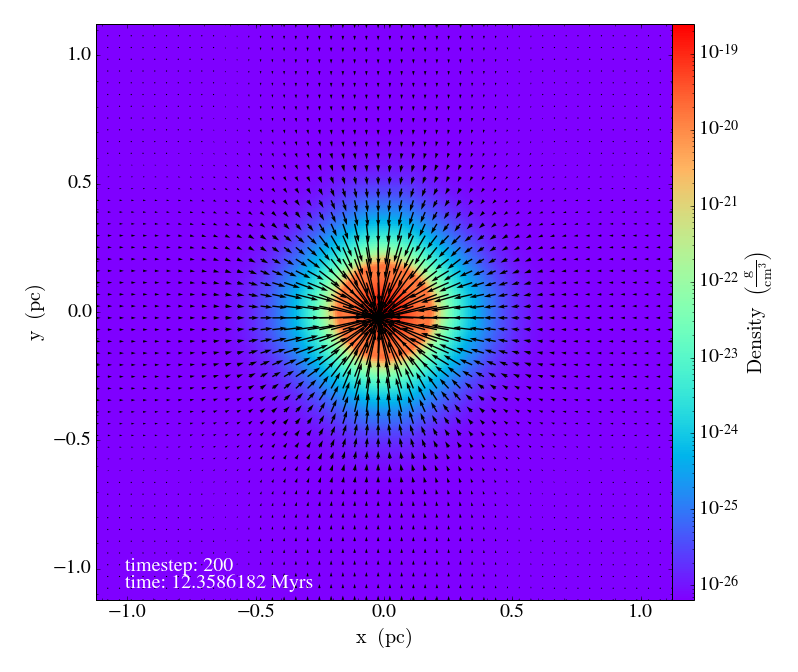

In [34]:
plot_is.plot_time_slice("density",200)

The velocity vectors overlaid is getting a bit too dense its hard to see the underlying density (this is probably a setting that I could change in yt, but for now I'm turning it off)

In [11]:
cd 12_12_rho_rat_17/

/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin/12_12_rho_rat_17



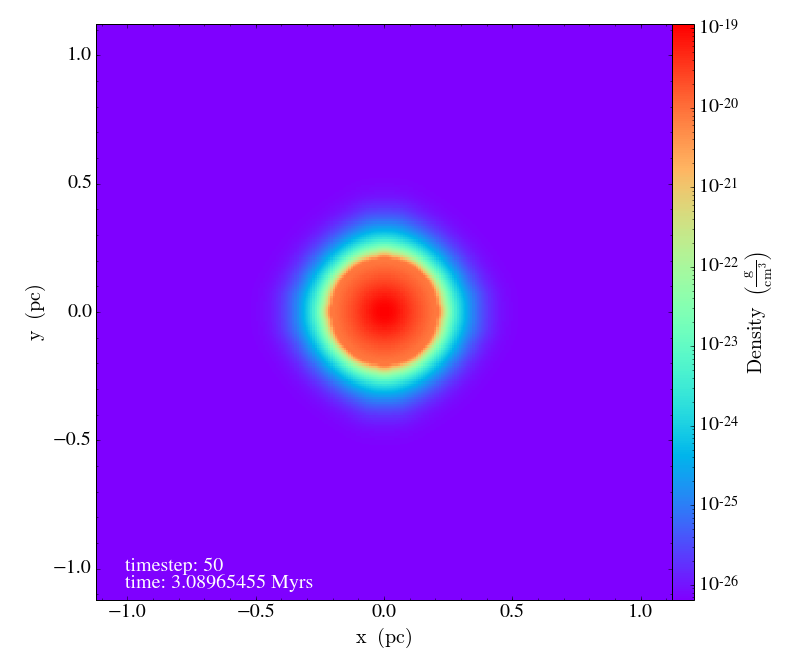


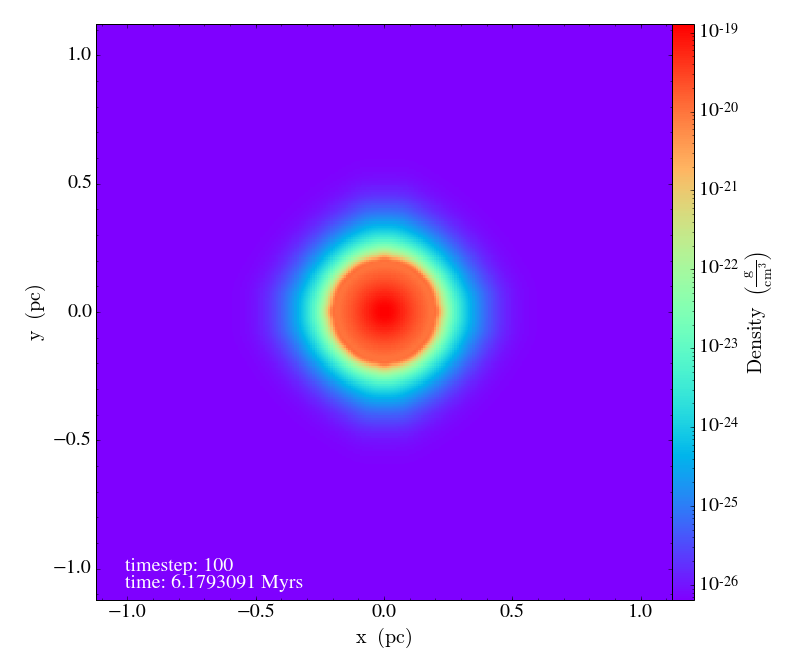


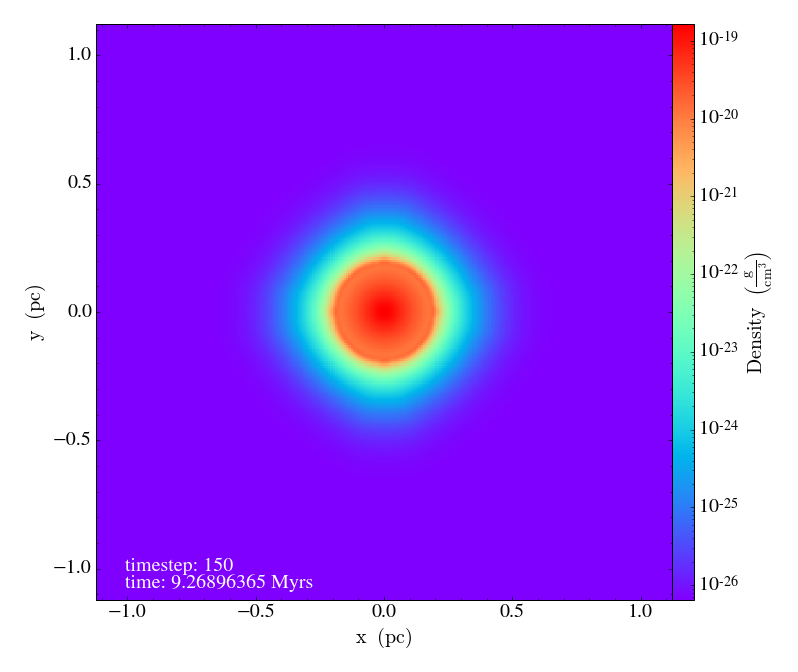


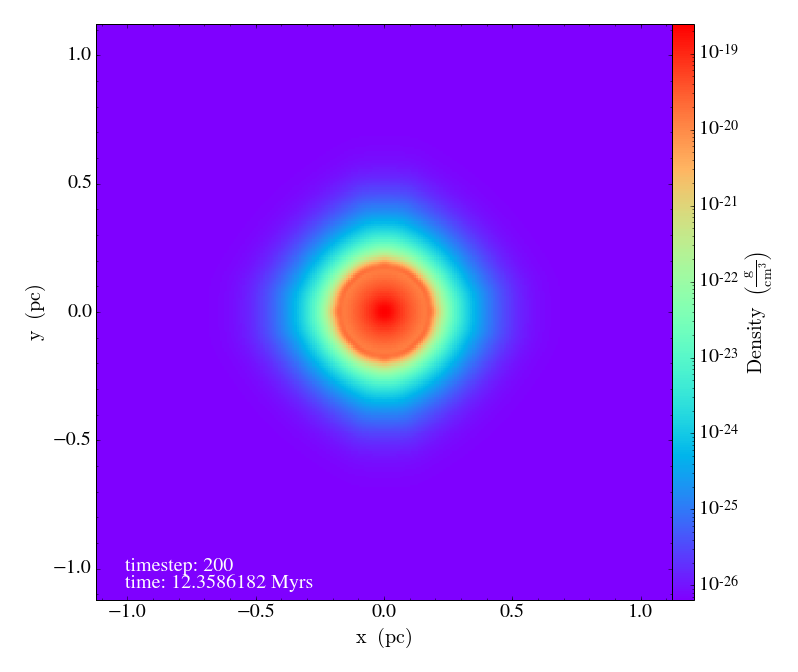


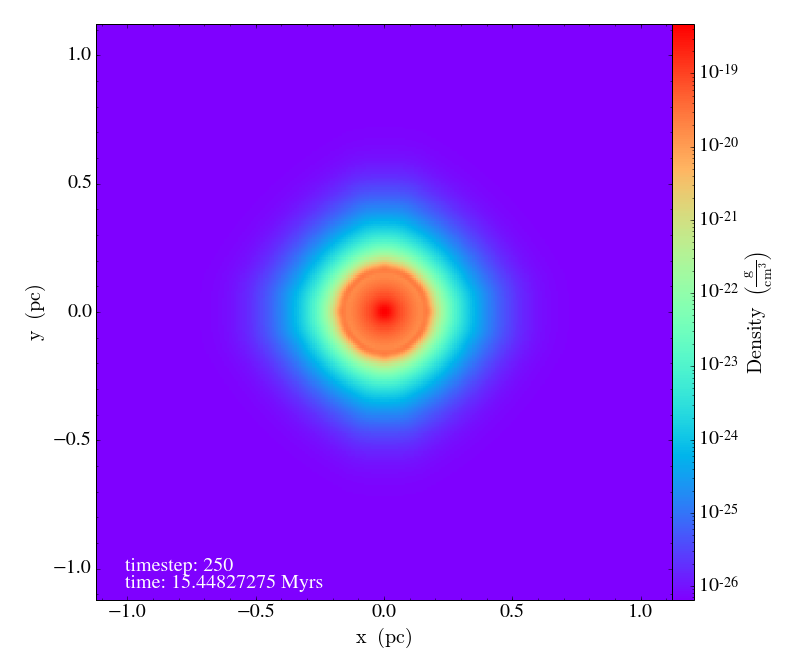


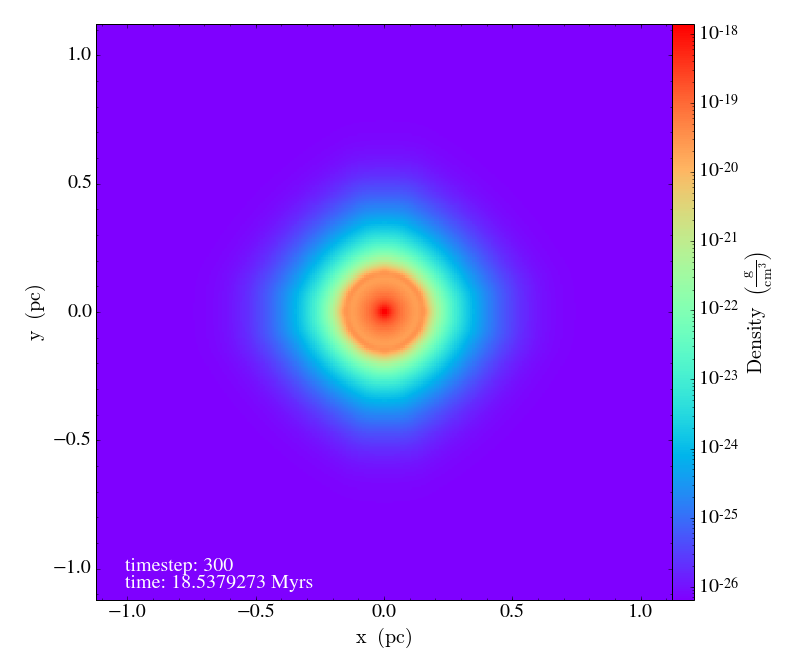


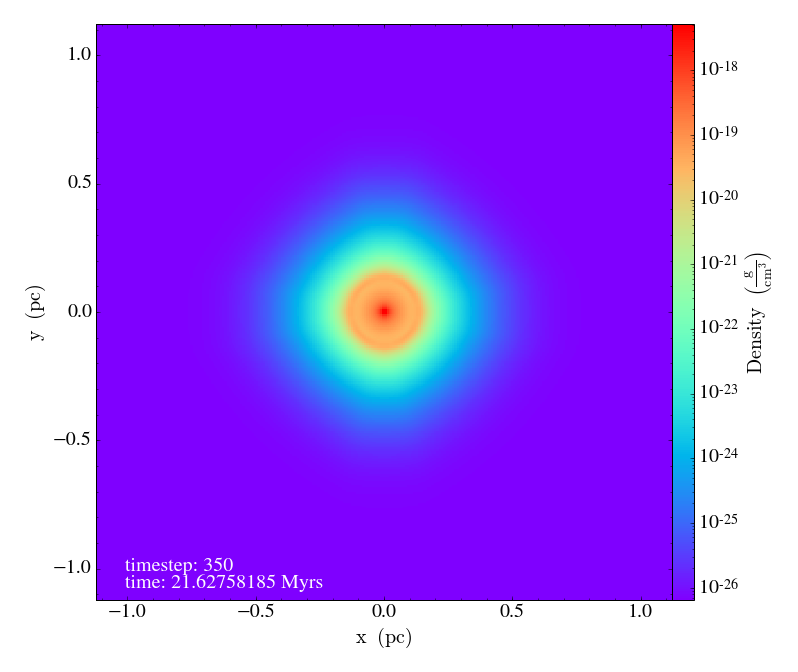

In [12]:
for i in np.arange(1,360):
    if i%50==0:
        plot_is.plot_time_slice("density",i,velocity=False)

Time steps gets quite restrictive as the dense core collapse (1e-5) 


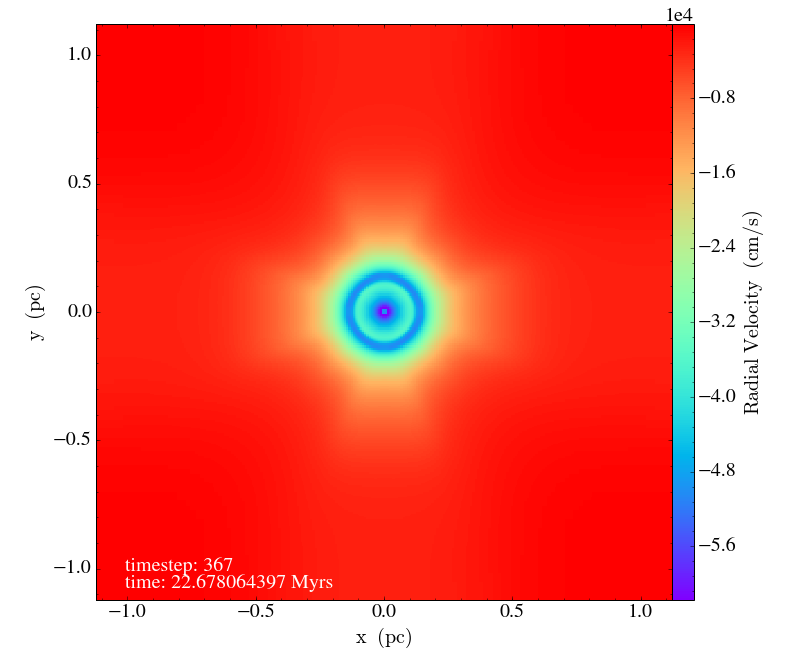

In [5]:
plot_is.plot_time_slice("radial_velocity",367,velocity=False)

~4 free fall time took about 15 hours to run. 

This is the result of $\xi_{max}=7$, yielding density constrast of ~17. These results are stored in: 
/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin/12_12_rho_rat_17

Okay we let this run for 1 free fall time to see if collapse actually happen, if it does then switch back to the critical 14.1 density contrast , the run to seee if collapse actually happens. If collapse does happen, we verify it is quilibrium configuration by turning off self gravity, we should evolve it for several free fall times just to check that nothing actually happens in the hydrostatic configurationa 